# Linear Regression Model - Bike Sharing Demand

In [149]:
from IPython.display import Image
Image(url= "https://img.freepik.com/free-vector/urban-bike-renting-system-by-using-phone-app-vector-illustration-smart-service-rent-bikes-city_121223-46.jpg?size=626&ext=jpg", width=900, height=200)

# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider __BoomBikes__ has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.


- How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.



## __Business Goal:__ 

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## __Importing Necessary module's__

In [150]:
# Importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [151]:
#Remove warnings in kernel while running a cell
import warnings
warnings.filterwarnings('ignore')

#notebook setting to display all the rowns and columns .
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns',None)

# Dataset  - "day.csv"

## Step 1: Reading and Understanding the Data

In [152]:
# Importing application_data.csv and vewing the dataframe

df_day_bike = pd.read_csv('day.csv')
df_day_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [153]:
# Let's see how many rows and columns we have

df_day_bike.shape

(730, 16)

In [154]:
# Checking the info of datasets

df_day_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [155]:
# as we can see dreday is object but in fact it a date formate converting it into data format
df_day_bike['dteday'] =  pd.to_datetime(df_day_bike['dteday'],format='%d-%m-%Y')

In [156]:
# checking info after changing

df_day_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [157]:
#checking for null values in dataset

df_day_bike.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [158]:
#from the given data we can see that instant is an index column so we drop it

df_day_bike.drop(['instant'],axis=1,inplace=True)

In [159]:
# Checking the various statistics of numeric variables of dataframe
df_day_bike.describe()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2018-12-31 12:00:00,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
min,2018-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2018-07-02 06:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,2018-12-31 12:00:00,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,2019-07-01 18:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,2019-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,NaN,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647


In [160]:
# after dropping instant checking the data frame

df_day_bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 2: Visualising the Data

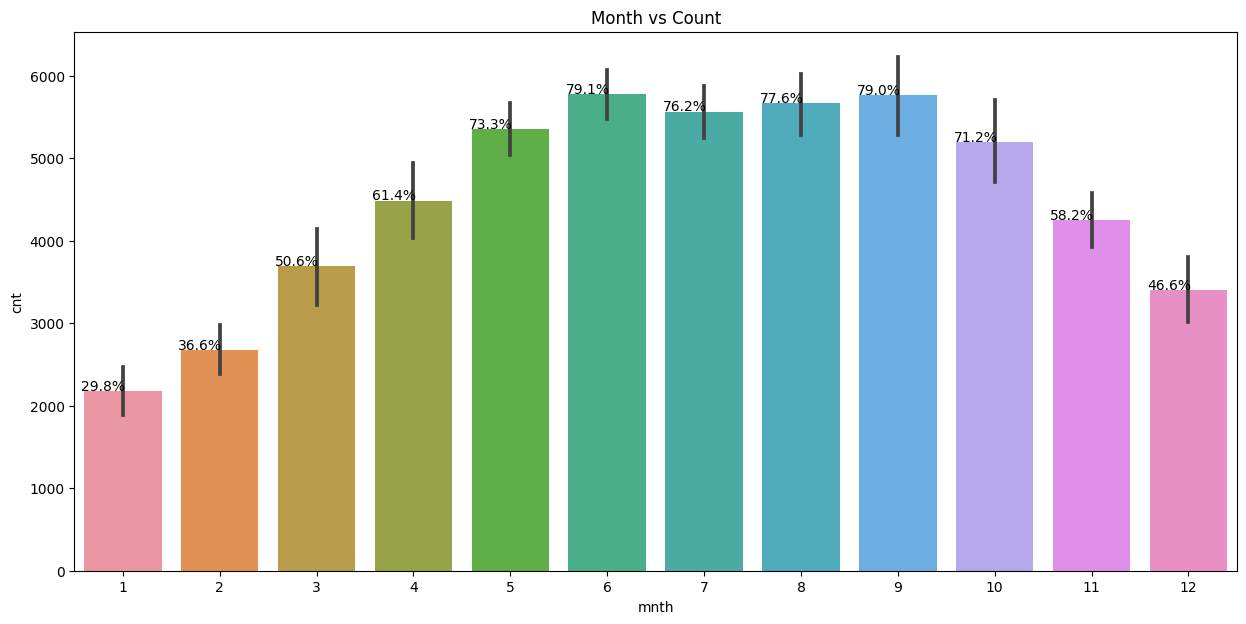

In [161]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x="mnth", y="cnt",data=df_day_bike)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format((p.get_height()/len(df_day_bike))*10), 
                    (p.get_x()+0.2, p.get_height()+10), ha='center')
plt.title('Month vs Count')

plt.show()

__Observation :__ The count of riders is the lowest in January and the highest in June. May, June, July, August, September and October record the highest number of riders.

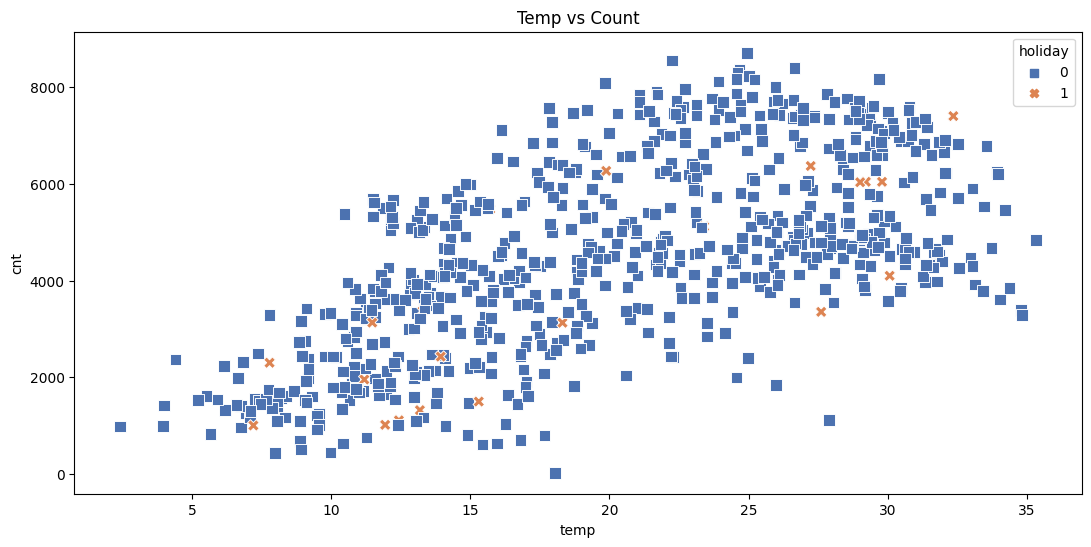

In [162]:
plt.figure(figsize = (13, 6)) 
markers = {1: "X", 0: "s"}
sns.scatterplot(x = 'temp', y = 'cnt', hue = 'holiday',
                style = 'holiday',palette="deep",s=70,
                markers=markers,data = df_day_bike) 
plt.title('Temp vs Count')
plt.show()

__Observation :__ Temperature and count have a linear relationship. With an increase in temperature, the count of riders increases.

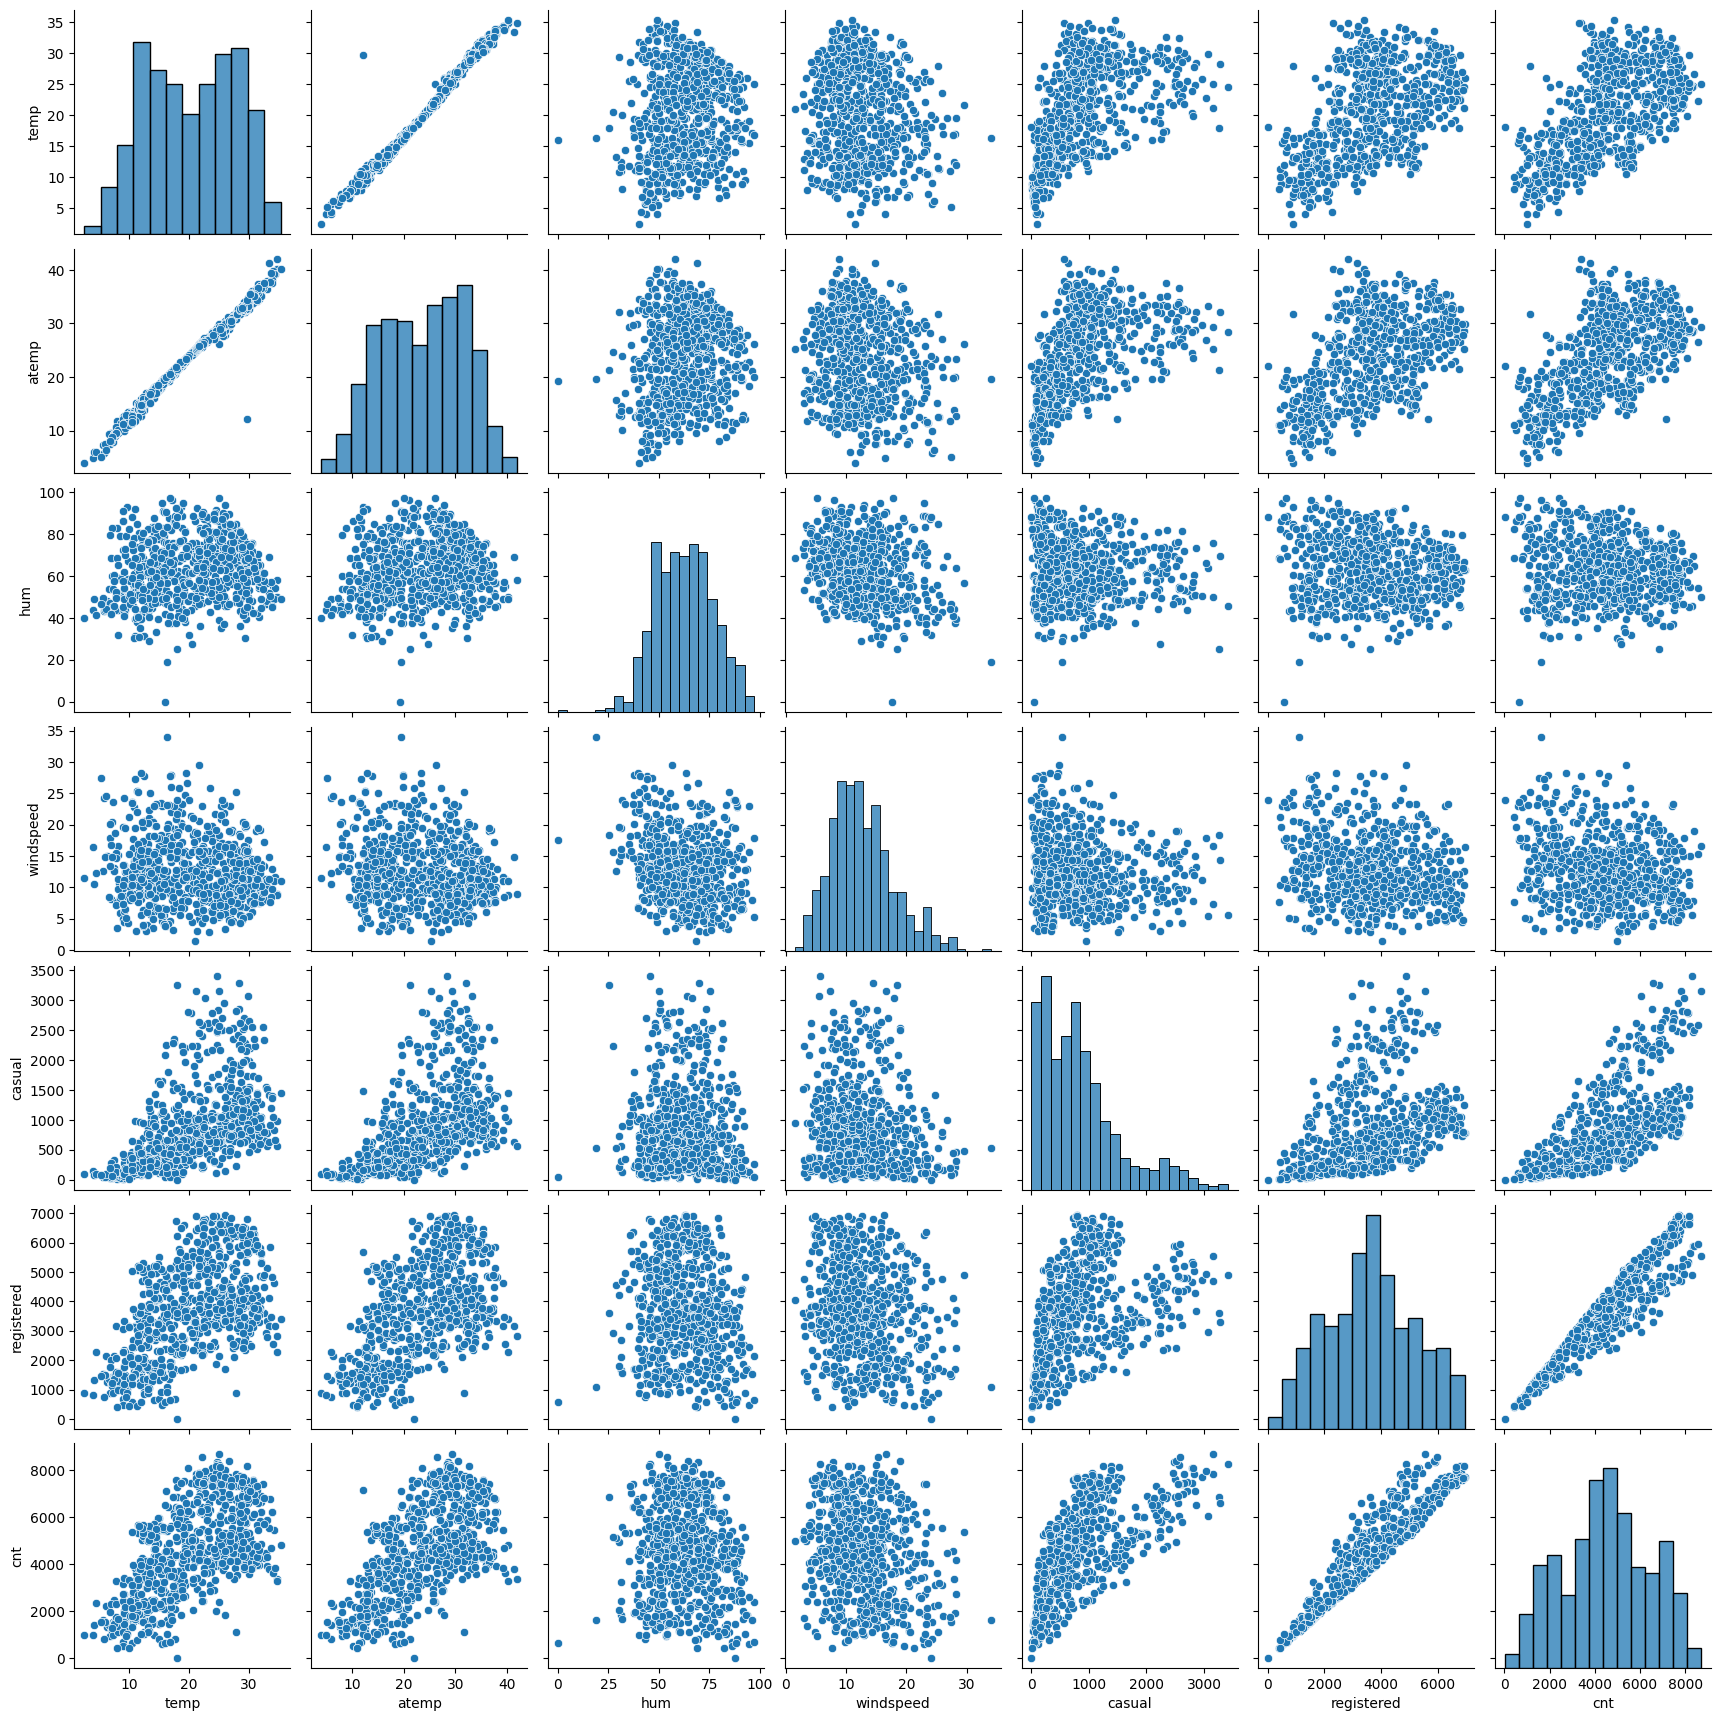

In [163]:
sns.pairplot(df_day_bike[['temp','atemp','hum','windspeed','casual','registered','cnt']])
plt.show()

__Observation :__ 
1. atemp and temp have a linear relationship with the target variable.


2. Windspeed and humidity don't appear to have any relationship with the count variable.

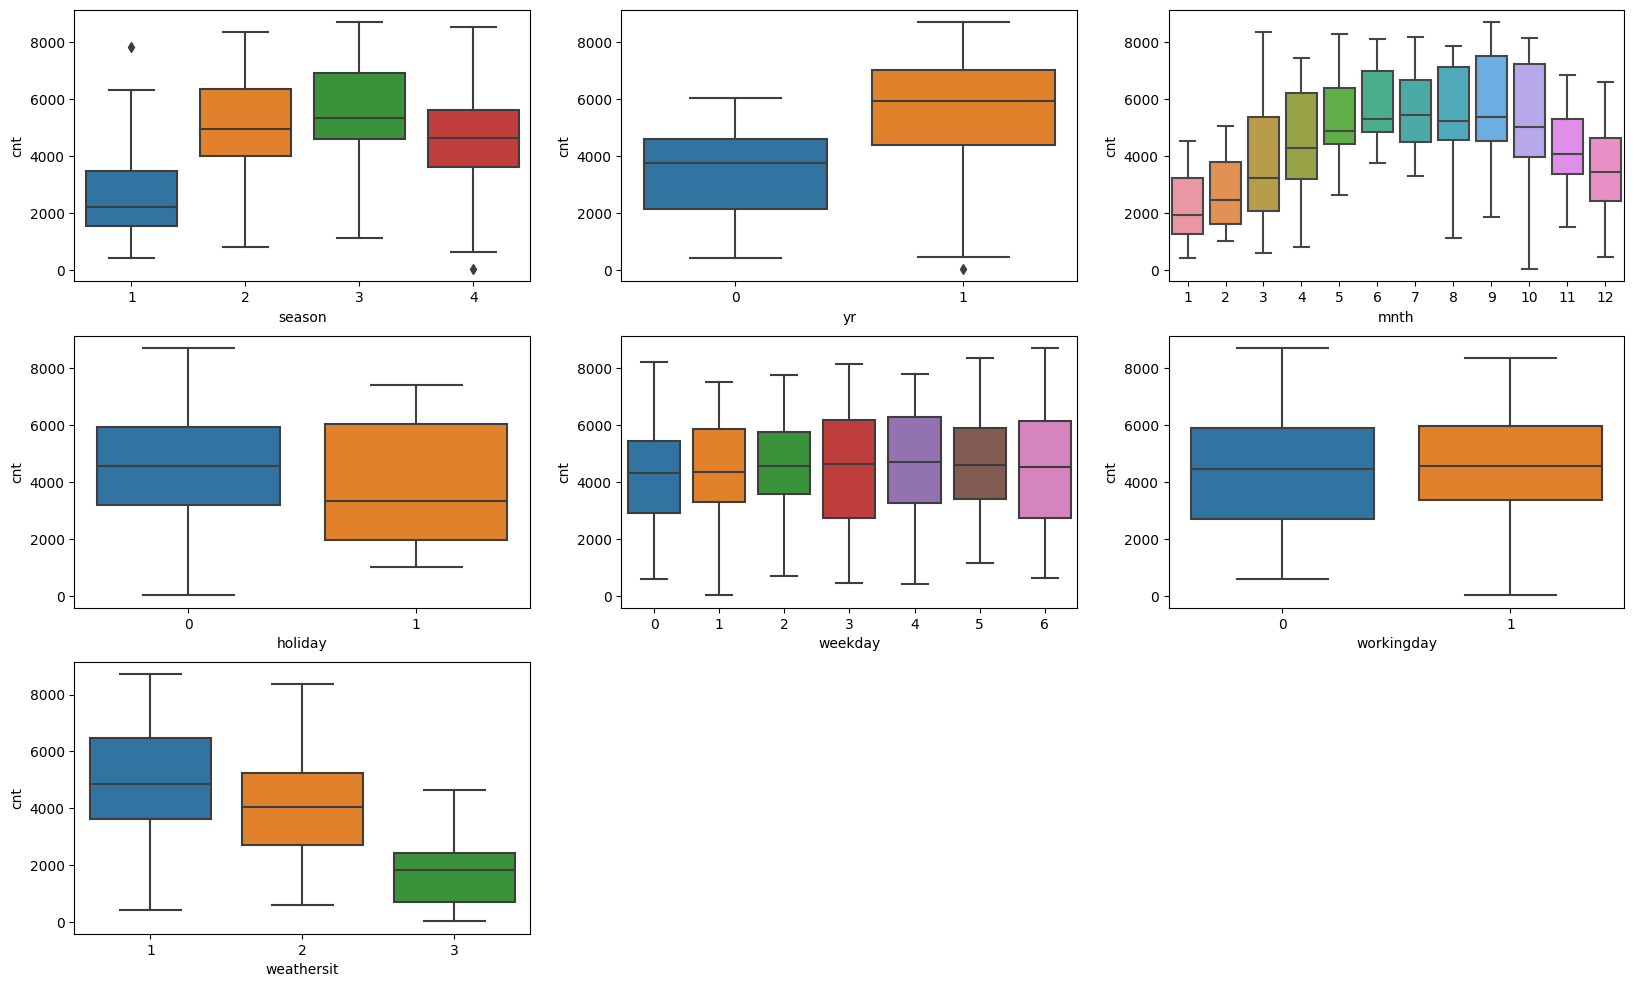

In [164]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_day_bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df_day_bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_day_bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_day_bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_day_bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_day_bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_day_bike)
plt.show()

__Observations :__

- From seasons we can observe that 3 i.e., fall has highest count of riders and spring has the lowest count of riders. (1: spring, 2: summer, 3: fall, 4: winter)


- There is a significant rise in the target variable i.e., riders from year 2018 to 2019. (0: 2018, 1:2019)


- The graph of weather sit we can state that clear/few clouds weather has the highest count of riders whereas light snow/ light rain has lowest. (1:  clear/few clouds, 2: Mist /Cloudy, Mist, 3: Light Snow, Light Rain)


- September has the highest count of riders and January has lowest among all the months


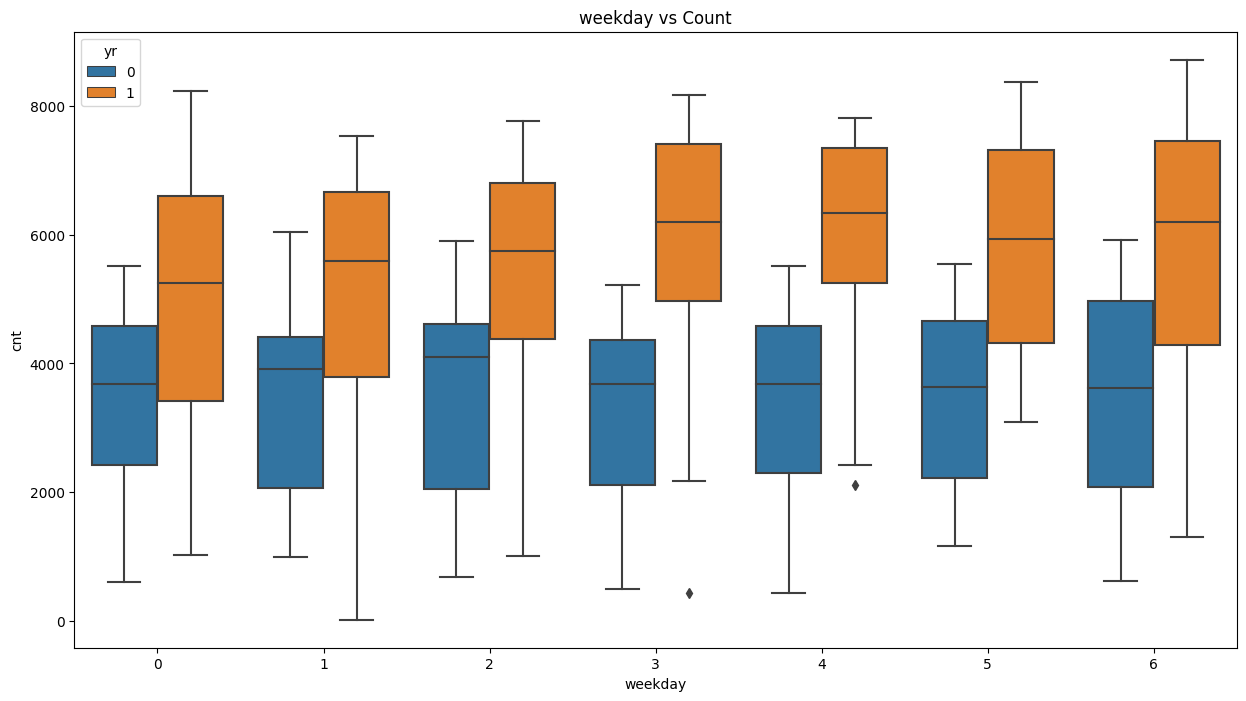

In [165]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'weekday', y = 'cnt', hue = 'yr', data = df_day_bike)
plt.title('weekday vs Count')
plt.show()

__Observations :__ The count of riders is higher in 2019 as opposed to 2018 across all the days of the week

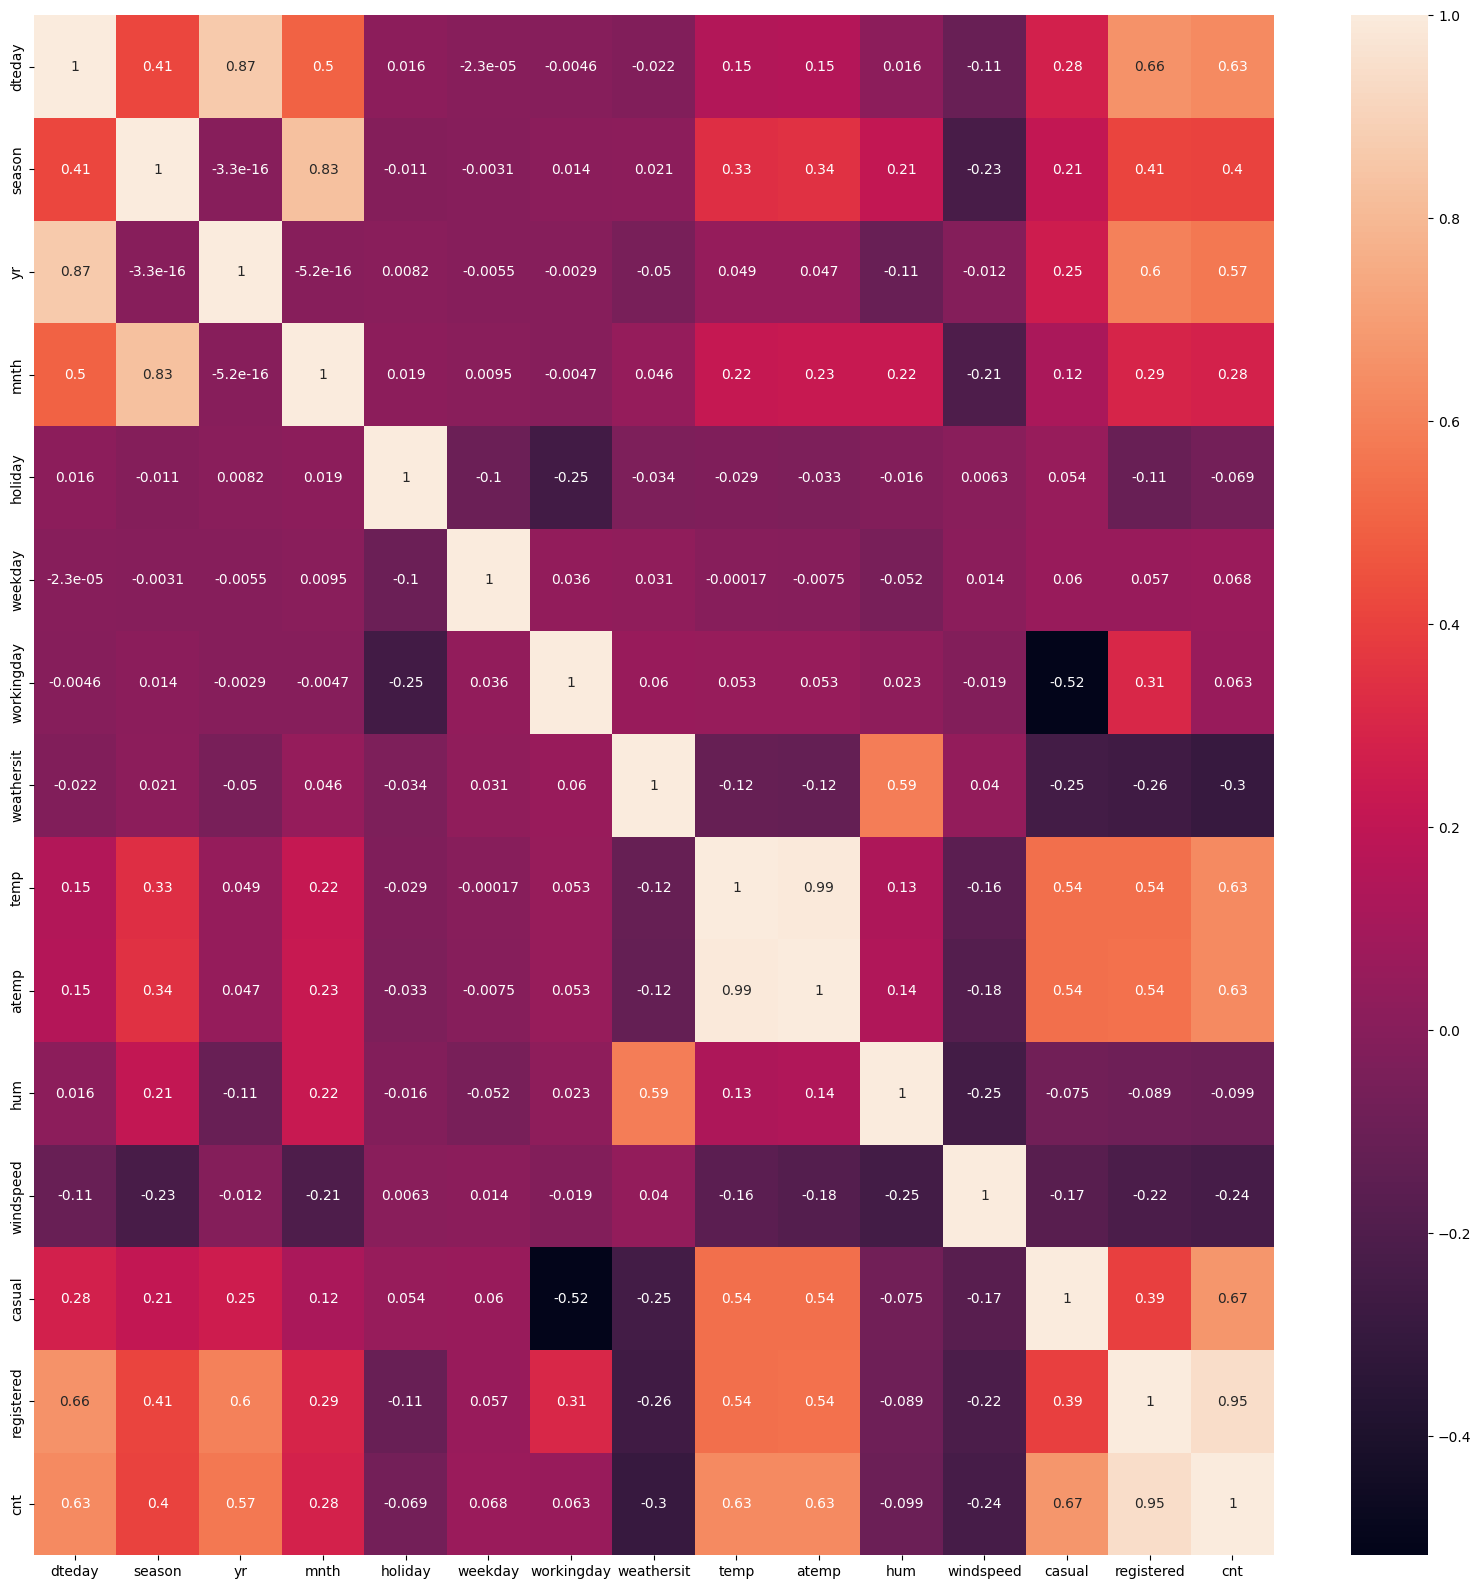

In [166]:
plt.figure(figsize=(20,20))
sns.heatmap(df_day_bike.corr(),annot=True,)
plt.show()

## Step 3: Data Preparation

We have a sense of what variables are important and that the data is well behaved with very few outliers, let’s move on to preparing the data for multiple linear regression. This involves handling the categorical variables first and then performing dummy encoding.

In [167]:
df_day_bike.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [168]:
# we can see column atemp having alternative of temp same data so we can drop atemp to avoid confusion
# and temp and atemp are highly corelated and it reperesent same outcome so droping one column 

df_day_bike.drop(['atemp'],axis=1,inplace=True)
df_day_bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2018-01-01,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,331,654,985
1,2018-01-02,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,131,670,801
2,2018-01-03,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,2018-01-04,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,2018-01-05,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,82,1518,1600


In [169]:
#we can see column dteday and yr month are having same data so we can drop dteday to avoid confusion

df_day_bike.drop(['dteday'],axis=1,inplace=True)
df_day_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,82,1518,1600


In [170]:
# as count is equal to casula and registered so we can drop it
df_day_bike.drop(['casual','registered',],axis=1,inplace=True)
df_day_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


__Converting catogorical column with actual names__

In [171]:
# as we can see season,weekday,mnth and weathersit is a categorical columns and we are converting the feature values to their actual names


df_day_bike['season'] = df_day_bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

df_day_bike['weekday'] = df_day_bike['weekday'].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",
                                                     4:"Thursday",5:"Friday",6:"Saturday"})

df_day_bike['weathersit'] = df_day_bike['weathersit'].map({1:"Clear_Few_Clouds",2:"Mist_cloudy",
                                                           3:"Light_rain_snow_Thunderstorm",
                                                          4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'})

df_day_bike['mnth'] = df_day_bike['mnth'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',
                                               8:'August',9:'September',10:'October',11:'November',12:'December'})

In [172]:
df_day_bike.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [173]:
df_day_bike.weathersit.value_counts()

weathersit
Clear_Few_Clouds                463
Mist_cloudy                     246
Light_rain_snow_Thunderstorm     21
Name: count, dtype: int64

In [174]:
df_day_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist_cloudy,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist_cloudy,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear_Few_Clouds,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear_Few_Clouds,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear_Few_Clouds,9.305237,43.6957,12.522300,1600


### Dummy Variables


In [175]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'Dummy_month'
Dummy_month = pd.get_dummies(df_day_bike['mnth'],drop_first = True)

# Check what the dataset 'Dummy_month' looks like
Dummy_month.head()

,August,December,February,January,July,June,March,May,November,October,September
0,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False


In [176]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'Dummy_season'
Dummy_season = pd.get_dummies(df_day_bike['season'],drop_first = True)

# Check what the dataset 'Dummy_season' looks like
Dummy_season.head()

,spring,summer,winter
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


In [177]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'Dummy_weekday'
Dummy_weekday = pd.get_dummies(df_day_bike['weekday'],drop_first = True)

# Check what the dataset 'Dummy_weekday' looks like
Dummy_weekday.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,False,True,False,False,False,False
1,False,False,True,False,False,False
2,True,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,False,True


In [178]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'Dummy_weathersit'
Dummy_weathersit = pd.get_dummies(df_day_bike['weathersit'],drop_first = True)

# Check what the dataset 'Dummy_weathersit' looks like
Dummy_weathersit.head()

,Light_rain_snow_Thunderstorm,Mist_cloudy
0,False,True
1,False,True
2,False,False
3,False,False
4,False,False


__Concatenating with main data frame__

In [179]:
df_bike_final = pd.concat([df_day_bike,Dummy_month,Dummy_season,Dummy_weekday,Dummy_weathersit],axis=1)

In [180]:
# Dropping the columns
df_bike_final = df_bike_final.drop(['season','mnth','weekday','weathersit'],axis=1)

In [181]:
# after dropping checking the head()
df_bike_final.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,August,December,February,January,July,June,March,May,November,October,September,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain_snow_Thunderstorm,Mist_cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True
1,0,0,0,14.902598,69.6087,16.652113,801,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True
2,0,0,1,8.050924,43.7273,16.636703,1349,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,59.0435,10.739832,1562,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,43.6957,12.522300,1600,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False


In [182]:
# Checking the statistical values 
df_bike_final.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


## Step 4: Splitting the Data into Training and Testing Sets

## Initial Steps
Before model building, we first need to perform the __test-train split and scale the features.__

In [185]:
# importing necessary library 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


import statsmodels.api as sm


from statsmodels.stats.outliers_influence import variance_inflation_factor


# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df_bike_final, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
# printing the shape of test and train data set
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `cnt`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling (normalisation): Between 0 and 1 (normalisation : $ (x - xmin)/(xmax - xmin)) $


2. Standardisation (mean-0, sigma-1) (stardardisation : $ (x - mu)/sigma) $

In [ ]:
# 1. Instantiate an object
scaler = MinMaxScaler()

In [ ]:
# Apply scaler() to all the columns numerical variables
num_vars = ['cnt', 'temp', 'hum','windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,August,December,February,January,July,June,March,May,November,October,September,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain_snow_Thunderstorm,Mist_cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1


In [ ]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,August,December,February,January,July,June,March,May,November,October,September,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain_snow_Thunderstorm,Mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.243137,0.245098,0.24902,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.429398,0.430568,0.43287,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


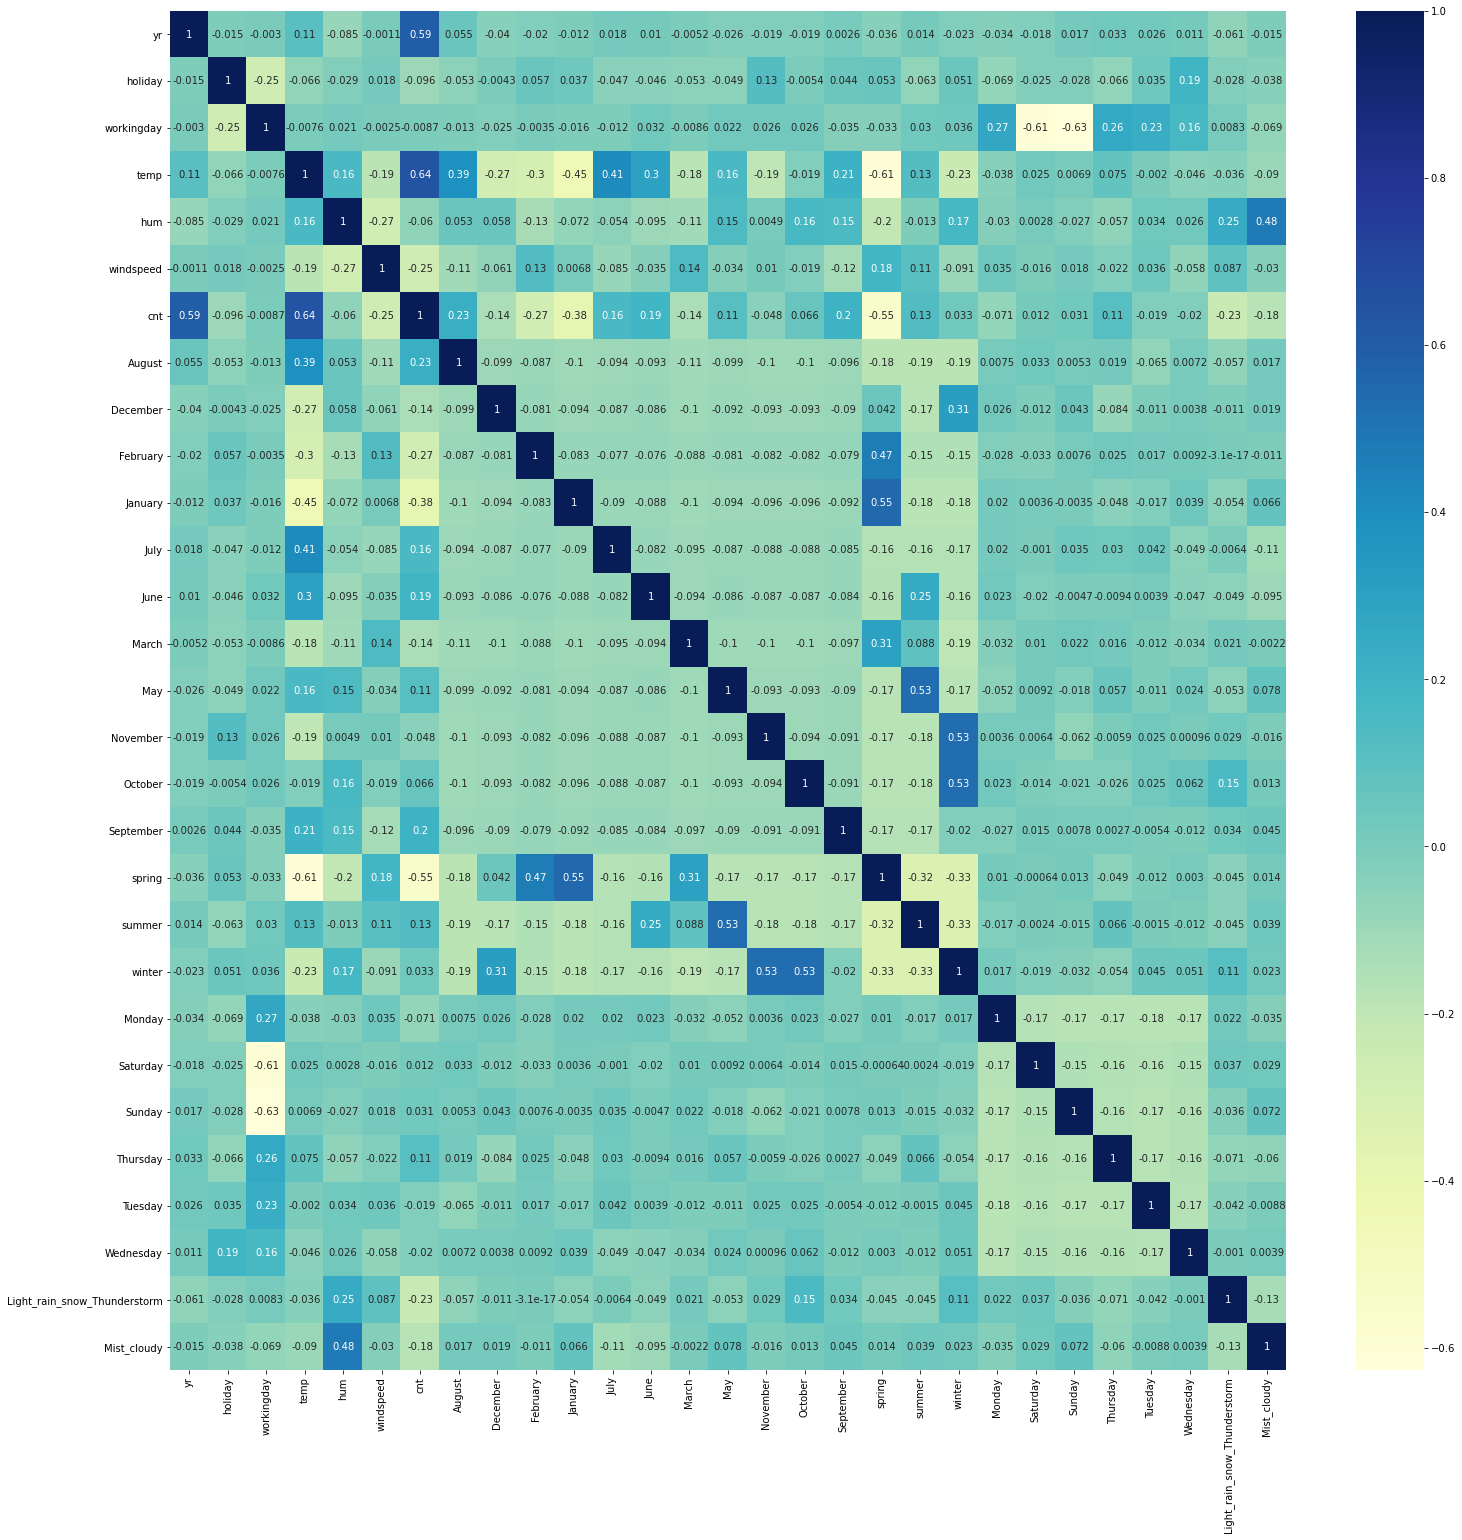

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

__Observation :__ Top 3 correlations with count variable: temp, yr and spring

# Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, we need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

### Dividing into X and Y sets for the model building

In [ ]:
# dividing into y train and x train
y_train = df_train.pop('cnt')
X_train = df_train

In [ ]:
#checking the head after splitting
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,August,December,February,January,July,June,March,May,November,October,September,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain_snow_Thunderstorm,Mist_cloudy
653,1,0,1,0.509887,0.575354,0.300794,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1


## Building our model

### RFE
Recursive feature elimination

In [ ]:
# Running RFE with the output number of the variable equal to 16
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 16)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [ ]:
# checking the rank of variables
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('August', False, 8),
 ('December', True, 1),
 ('February', True, 1),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('March', False, 13),
 ('May', False, 5),
 ('November', True, 1),
 ('October', False, 10),
 ('September', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Monday', False, 7),
 ('Saturday', False, 3),
 ('Sunday', False, 4),
 ('Thursday', False, 11),
 ('Tuesday', False, 6),
 ('Wednesday', False, 9),
 ('Light_rain_snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1)]

In [ ]:
# checking RFE Support for selecting
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'December', 'February', 'January', 'July', 'November', 'September', 'spring', 'summer', 'winter', 'Light_rain_snow_Thunderstorm', 'Mist_cloudy'], dtype='object')

In [ ]:
# checking the length 
len(col)

16

In [ ]:
# negating the col which are not selected 
X_train.columns[~rfe.support_]

Index(['workingday', 'August', 'June', 'March', 'May', 'October', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'], dtype='object')

### Building model using statsmodel, for the detailed statistics

## Model 1

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


# Adding a constant variable 
import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.7
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.15e-188
Time:                        22:59:44   Log-Likelihood:                 516.15
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     493   BIC:                            -926.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3320      0.037      9.056      0.000       0.260       0.404
yr                               0.2307      0.008     28.597      0.000       0.215       0.247
holiday                         -0.0887      0.026     -3.469      0.001      -0.139      -0.038
temp                             0.4639      0.038     12.156      0.000       0.389       0.539
hum                             -0.1581      0.038     -4.189      0.000      -0.232      -0.084
windspeed                       -0.1897      0.026     -7.369      0.000      -0.240      -0.139
December                        -0.0465      0.018     -2.541      0.011      -0.082      -0.011
February                        -0.0361      0.022     -1.667      0.096      -0.079       0.006
January                         -0.0631      0.021     -2.936      0.003      -0.105      -0.021
July                            -0.0545      0.018     -2.995      0.003      -0.090      -0.019
November                        -0.0458      0.019     -2.421      0.016      -0.083      -0.009
September                        0.0734      0.017      4.349      0.000       0.040       0.107
spring                          -0.0518      0.022     -2.353      0.019      -0.095      -0.009
summer                           0.0374      0.015      2.425      0.016       0.007       0.068
winter                           0.1016      0.018      5.662      0.000       0.066       0.137
Light_rain_snow_Thunderstorm    -0.2495      0.026     -9.468      0.000      -0.301      -0.198
Mist_cloudy                     -0.0562      0.010     -5.375      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       71.849   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.456
Skew:                          -0.726   Prob(JB):                     4.82e-39
Kurtosis:                       5.489   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Droping the const for calculating vif
X_train_new = X_train_rfe.drop(["const"], axis = 1)

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.58
2,temp,18.34
11,spring,5.45
4,windspeed,4.73
13,winter,4.06
12,summer,2.81
7,January,2.38
15,Mist_cloudy,2.32
0,yr,2.09
6,February,1.92


In [ ]:
# dropping one variable which is having high P value
X_train_new = X_train_new.drop(["February"], axis = 1)

## Model 2

In [ ]:
# Adding a constant variable 

X_train_new = sm.add_constant(X_train_new)

lm_2 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          3.34e-189
Time:                        22:59:45   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3202      0.036      8.886      0.000       0.249       0.391
yr                               0.2303      0.008     28.511      0.000       0.214       0.246
holiday                         -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                             0.4800      0.037     12.977      0.000       0.407       0.553
hum                             -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed                       -0.1885      0.026     -7.312      0.000      -0.239      -0.138
December                        -0.0372      0.017     -2.131      0.034      -0.071      -0.003
January                         -0.0437      0.018     -2.415      0.016      -0.079      -0.008
July                            -0.0555      0.018     -3.046      0.002      -0.091      -0.020
November                        -0.0409      0.019     -2.187      0.029      -0.078      -0.004
September                        0.0749      0.017      4.438      0.000       0.042       0.108
spring                          -0.0617      0.021     -2.907      0.004      -0.103      -0.020
summer                           0.0408      0.015      2.659      0.008       0.011       0.071
winter                           0.1034      0.018      5.763      0.000       0.068       0.139
Light_rain_snow_Thunderstorm    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
Mist_cloudy                     -0.0559      0.010     -5.338      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Dropping the const for calculating vif
X_train_new = X_train_new.drop(["const"], axis = 1)

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
10,spring,4.37
12,winter,4.06
11,summer,2.81
14,Mist_cloudy,2.32
0,yr,2.09
8,November,1.83
6,January,1.75


In [ ]:
# as we can see hum is having high VIF value so we are dropping it
X_train_new = X_train_new.drop(["hum"], axis = 1)

## Model 3

In [ ]:
# Adding a constant variable 

X_train_new = sm.add_constant(X_train_new)

lm_3 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.57e-186
Time:                        22:59:45   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2466      0.032      7.679      0.000       0.184       0.310
yr                               0.2343      0.008     28.709      0.000       0.218       0.250
holiday                         -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp                             0.4377      0.036     12.083      0.000       0.366       0.509
windspeed                       -0.1586      0.025     -6.290      0.000      -0.208      -0.109
December                        -0.0445      0.018     -2.520      0.012      -0.079      -0.010
January                         -0.0503      0.018     -2.738      0.006      -0.086      -0.014
July                            -0.0504      0.018     -2.725      0.007      -0.087      -0.014
November                        -0.0419      0.019     -2.198      0.028      -0.079      -0.004
September                        0.0682      0.017      3.992      0.000       0.035       0.102
spring                          -0.0716      0.021     -3.337      0.001      -0.114      -0.029
summer                           0.0333      0.015      2.148      0.032       0.003       0.064
winter                           0.0887      0.018      4.951      0.000       0.053       0.124
Light_rain_snow_Thunderstorm    -0.2929      0.025    -11.908      0.000      -0.341      -0.245
Mist_cloudy                     -0.0814      0.009     -9.359      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Dropping the const for calculating vif
X_train_new = X_train_new.drop(["const"], axis = 1)

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
11,winter,2.94
9,spring,2.89
10,summer,2.23
0,yr,2.07
7,November,1.80
5,January,1.66
6,July,1.59
13,Mist_cloudy,1.56


In [ ]:
# dropping one variable which is having high P value i.e. alpha taken as 0.01 level
X_train_new = X_train_new.drop(["summer"], axis = 1)

## Model 4

In [ ]:
# Adding a constant variable 

X_train_new = sm.add_constant(X_train_new)

lm_4 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.08e-186
Time:                        22:59:45   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2893      0.025     11.427      0.000       0.240       0.339
yr                               0.2348      0.008     28.679      0.000       0.219       0.251
holiday                         -0.0913      0.026     -3.496      0.001      -0.143      -0.040
temp                             0.4026      0.032     12.407      0.000       0.339       0.466
windspeed                       -0.1540      0.025     -6.108      0.000      -0.204      -0.104
December                        -0.0510      0.017     -2.918      0.004      -0.085      -0.017
January                         -0.0556      0.018     -3.047      0.002      -0.091      -0.020
July                            -0.0643      0.017     -3.705      0.000      -0.098      -0.030
November                        -0.0488      0.019     -2.593      0.010      -0.086      -0.012
September                        0.0537      0.016      3.409      0.001       0.023       0.085
spring                          -0.1034      0.016     -6.613      0.000      -0.134      -0.073
winter                           0.0650      0.014      4.588      0.000       0.037       0.093
Light_rain_snow_Thunderstorm    -0.2949      0.025    -11.954      0.000      -0.343      -0.246
Mist_cloudy                     -0.0812      0.009     -9.297      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       70.900   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.224
Skew:                          -0.695   Prob(JB):                     3.65e-41
Kurtosis:                       5.614   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Droping the const for calculating vif
X_train_new = X_train_new.drop(["const"], axis = 1)

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.67
3,windspeed,4.05
10,winter,2.54
9,spring,2.36
0,yr,2.06
7,November,1.80
5,January,1.65
12,Mist_cloudy,1.53
4,December,1.46
6,July,1.36


In [ ]:
# among all the months December has the higest p value hence dropping it due to in significance 
X_train_new = X_train_new.drop(["December"], axis = 1)

# Model 5

In [ ]:
# Adding a constant variable 

X_train_new = sm.add_constant(X_train_new)

lm_5 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.5
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          4.86e-186
Time:                        22:59:45   Log-Likelihood:                 498.90
No. Observations:                 510   AIC:                            -971.8
Df Residuals:                     497   BIC:                            -916.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2696      0.025     10.966      0.000       0.221       0.318
yr                               0.2349      0.008     28.477      0.000       0.219       0.251
holiday                         -0.0926      0.026     -3.519      0.000      -0.144      -0.041
temp                             0.4273      0.032     13.542      0.000       0.365       0.489
windspeed                       -0.1464      0.025     -5.795      0.000      -0.196      -0.097
January                         -0.0433      0.018     -2.422      0.016      -0.079      -0.008
July                            -0.0683      0.017     -3.915      0.000      -0.103      -0.034
November                        -0.0282      0.018     -1.604      0.109      -0.063       0.006
September                        0.0567      0.016      3.585      0.000       0.026       0.088
spring                          -0.1039      0.016     -6.599      0.000      -0.135      -0.073
winter                           0.0515      0.013      3.817      0.000       0.025       0.078
Light_rain_snow_Thunderstorm    -0.2895      0.025    -11.680      0.000      -0.338      -0.241
Mist_cloudy                     -0.0807      0.009     -9.174      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       62.130   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.383
Skew:                          -0.637   Prob(JB):                     2.21e-33
Kurtosis:                       5.336   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X_train_new = X_train_new.drop(["const"], axis = 1)

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.65
3,windspeed,4.04
8,spring,2.25
0,yr,2.06
9,winter,1.92
4,January,1.60
6,November,1.59
11,Mist_cloudy,1.53
5,July,1.36
7,September,1.21


In [ ]:
# dropping one variable which is having high P value i.e. alpha taken as 0.01
X_train_new = X_train_new.drop(["November"], axis = 1)

# Model 6

In [ ]:
# Adding a constant variable 

X_train_new = sm.add_constant(X_train_new)

lm_6 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.13e-186
Time:                        22:59:45   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2657      0.025     10.843      0.000       0.218       0.314
yr                               0.2348      0.008     28.426      0.000       0.219       0.251
holiday                         -0.0977      0.026     -3.738      0.000      -0.149      -0.046
temp                             0.4335      0.031     13.817      0.000       0.372       0.495
windspeed                       -0.1482      0.025     -5.863      0.000      -0.198      -0.099
January                         -0.0427      0.018     -2.382      0.018      -0.078      -0.007
July                            -0.0693      0.017     -3.967      0.000      -0.104      -0.035
September                        0.0587      0.016      3.710      0.000       0.028       0.090
spring                          -0.1013      0.016     -6.459      0.000      -0.132      -0.071
winter                           0.0432      0.012      3.462      0.001       0.019       0.068
Light_rain_snow_Thunderstorm    -0.2877      0.025    -11.601      0.000      -0.336      -0.239
Mist_cloudy                     -0.0802      0.009     -9.106      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       58.998   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.235
Skew:                          -0.614   Prob(JB):                     5.83e-31
Kurtosis:                       5.246   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X_train_new = X_train_new.drop(["const"], axis = 1)

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.63
3,windspeed,4.00
7,spring,2.25
0,yr,2.06
4,January,1.60
10,Mist_cloudy,1.53
8,winter,1.40
5,July,1.36
6,September,1.20
9,Light_rain_snow_Thunderstorm,1.08


In [ ]:
# dropping one variable which is having high P value i.e. alpha taken as 0.01
X_train_new = X_train_new.drop(["January"], axis = 1)

# Model 7

In [ ]:
# Adding a constant variable 

X_train_new = sm.add_constant(X_train_new)

lm_7 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.16e-186
Time:                        22:59:46   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2519      0.024     10.530      0.000       0.205       0.299
yr                               0.2341      0.008     28.224      0.000       0.218       0.250
holiday                         -0.0986      0.026     -3.752      0.000      -0.150      -0.047
temp                             0.4515      0.031     14.758      0.000       0.391       0.512
windspeed                       -0.1398      0.025     -5.559      0.000      -0.189      -0.090
July                            -0.0727      0.017     -4.160      0.000      -0.107      -0.038
September                        0.0577      0.016      3.635      0.000       0.027       0.089
spring                          -0.1108      0.015     -7.265      0.000      -0.141      -0.081
winter                           0.0473      0.012      3.804      0.000       0.023       0.072
Light_rain_snow_Thunderstorm    -0.2864      0.025    -11.499      0.000      -0.335      -0.237
Mist_cloudy                     -0.0811      0.009     -9.182      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       58.020   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.195
Skew:                          -0.601   Prob(JB):                     9.80e-31
Kurtosis:                       5.249   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.16e-186
Time:                        22:59:46   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
X_train_new = X_train_new.drop(["const"], axis = 1)

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
6,spring,1.65
9,Mist_cloudy,1.51
7,winter,1.40
4,July,1.35
5,September,1.20
8,Light_rain_snow_Thunderstorm,1.08
1,holiday,1.04


# Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [ ]:
# adding constant for x train variable
X_train_new = sm.add_constant(X_train_new)

In [ ]:
# Calculating the y train predict values
y_train_cnt_pre = lm_7.predict(X_train_new)

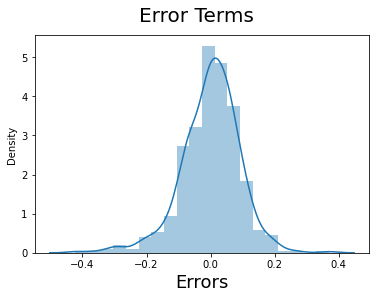

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt_pre), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

__Observation :__ The error terms are normally distributed and the mean of error terms is 0. 

In [ ]:
residuals = y_train.values-y_train_cnt_pre
mean_residuals = round(np.mean(residuals))
print("Mean_Residuals {}".format(mean_residuals))

Mean_Residuals 0


__From the above calculation we can see that Mean is at Zero__

Text(0.5, 0, 'Errors')

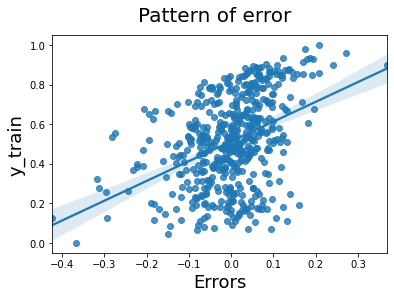

In [ ]:
fig = plt.figure()
sns.regplot(x = (y_train - y_train_cnt_pre), y = y_train)
fig.suptitle('Pattern of error', fontsize = 20)                  # Plot heading 
plt.ylabel('y_train', fontsize = 18) 
plt.xlabel('Errors', fontsize = 18)


__Observation :__ The error terms appear to be independent.

Text(0.5, 0, 'Errors')

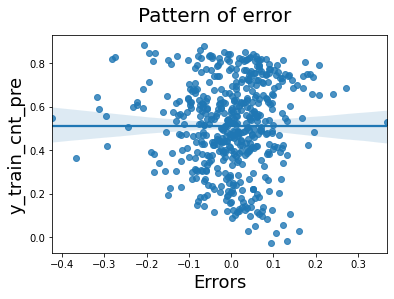

In [ ]:
fig = plt.figure()
sns.regplot(x = (y_train - y_train_cnt_pre), y = y_train_cnt_pre)
fig.suptitle('Pattern of error', fontsize = 20)                  # Plot heading 
plt.ylabel('y_train_cnt_pre', fontsize = 18) 
plt.xlabel('Errors', fontsize = 18)

__Observation :__ The error terms appear to be independent.

# Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [ ]:
# Scalling the numerical values
num_vars_1 = ['cnt','temp', 'hum', 'windspeed']

df_test[num_vars_1] = scaler.transform(df_test[num_vars_1])

### Dividing into X_test and y_test

In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train_new.drop('const',axis=1,inplace=True)
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)



# Making predictions
y_pred1 = lm_7.predict(X_test_new)

# Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

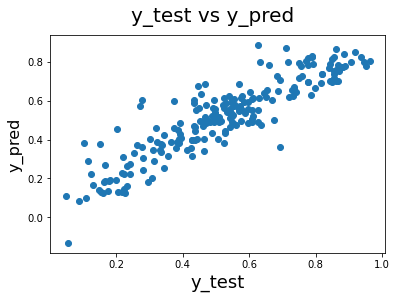

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred1)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)    

__Observation :__ The predicted and actual values of y seem to be near to each other

In [ ]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred1))*100

9.574033200511813

### Calculate the R square for test

In [ ]:
#Calculate the r square for test

r_squared = r2_score(y_true=y_test, y_pred = y_pred1)
r_squared*100

80.70101019557963

## $ R^2 for Test = 80.70 % $

### Calculating adjusted R square for test

In [ ]:
# adjusted r squre for test

adj_r_squared_train = 0.8303

r = X_test.shape[0]
c = X_test.shape[1]
adj_r_squared_test = 1-(((1-r_squared)*(r-1))/(r-c-1))
adj_r_squared_test*100

77.85694854019137

### $  Adjusted   R^2   for   Test   =   77.86 % $

### Calculating diffrence of R squared of train and test data

In [ ]:
r_squared_train = 0.833
# difference between r squared of train and test data
round((r_squared_train-r_squared)*100,2)

NameError: name 'r_squared' is not defined

#### $  Diffrence  of  R^2  of   train   &   test   data = 2.59 $

### Calculating diffrence of Adj R squared of train and test data

In [ ]:
# Adjested r square  diff

round((r_squared_train - adj_r_squared_test),2)*100

NameError: name 'r_squared_train' is not defined

The difference between the adjusted r squares of test and train data is <= 5%. So, the model appears to be appropriate.

#### $  Diffrence  of  Adj  R^2  of   train   &   test   data = 5 $

## Final Equation


We can see that the __equation of our best fitted line is:__

### $ CNT = 0.2519 + 0.2341*yr +  holiday*(-0.0986) + temp*(0.4515) + windspeed*(-0.1398) + July*(-0.0727) + September*(0.0577)  + spring*(-0.1108) + winter*(0.0473) + Light_rain_snow_Thunderstorm*(-0.2864) + Mist_cloudy*(-0.0811)
        $

### Analysing the above model, the comapany should focus on the following features:
- Company should focus on expanding business during Spring.


- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.


- There would be less bookings during Light_Rain_Snow , they could probably use this time to service the bikes without having business impact.


#### _Hence when the situation comes back to normal, the company should come up with new offers and schemes during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best._


## _Conclusion_


Significant variables to predict the demand for shared bikes


- holiday


- temp


- windspeed


- Season


- months(July, September)


- Year (2019)


- weathersit( Light_rain_Snow, Mist_Cloudy)